# [Ссылка на ноутбук в Google Collab](https://colab.research.google.com/drive/1_l6ucljWJgF4Y65aOpPWp5plsazyUlbq?usp=sharing)

# Подготовка среды и датасетов

In [1]:
from itertools import cycle, islice

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
plt.rcParams['figure.figsize'] = 12, 8

In [3]:
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

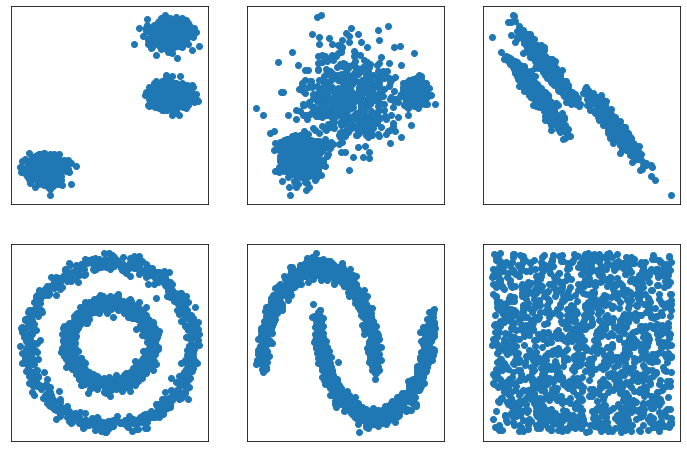

In [4]:
# Визуализируем кластеры
datasets_list = [blobs, varied, aniso, noisy_circles, noisy_moons, no_structure]
for i, X in enumerate(datasets_list, start=1):
    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:, 0], X[:, 1])

       
    

# KMeans

Интерактивная визуализация работы KMeans – https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Для примера из видео: **Random** $\rightarrow$ **Packed Circles**

![KMeans](https://www.jeremyjordan.me/content/images/2016/12/kmeans.gif "KMeans")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [5]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=8, 
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 max_iter=300
                )

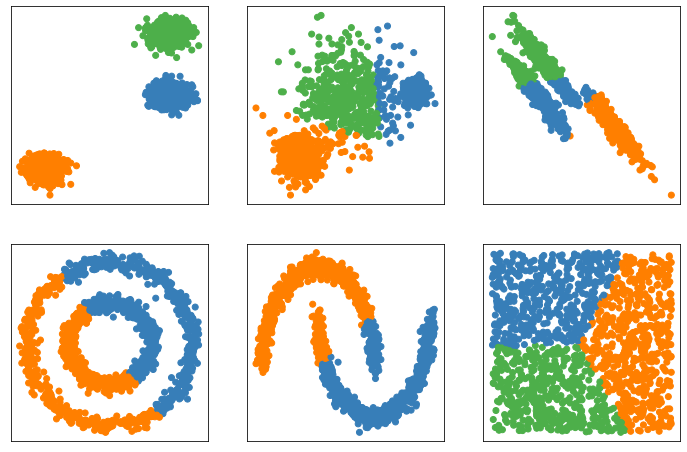

In [6]:
# создаём массив пар – датасета и соответствующих для него параметров алгоритма
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, k_means_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    k_means = KMeans(n_clusters=k_means_params['n_clusters'])
    
    k_means.fit(X)
    y_pred = k_means.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

# Практика

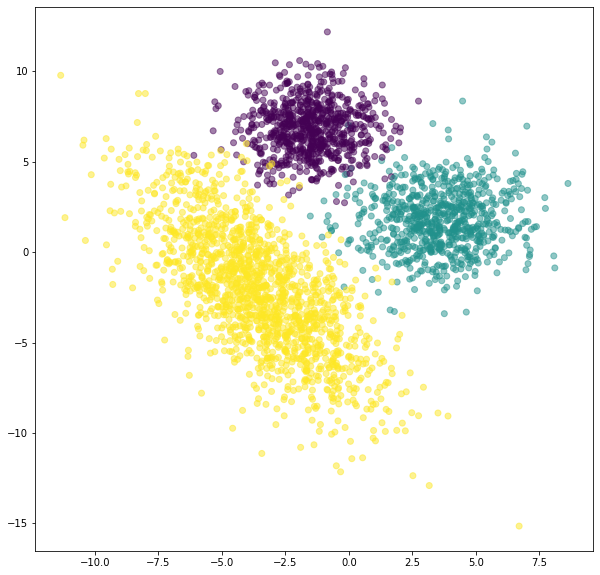

{0: 750, 1: 750, 2: 1500}

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()
# распределение классов в датасете
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

[[-3 -3]
 [-2  6]
 [ 4  2]]
{0: 1320, 1: 938, 2: 742}


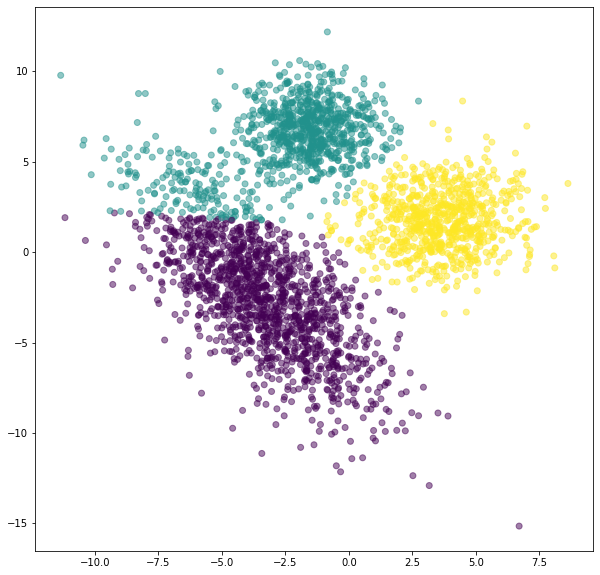

In [23]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3,random_state=42)
k_means.fit(X)
print(np.round(k_means.cluster_centers_).astype(np.int))




# распределение классов в датасете
_, counts = np.unique(k_means.labels_, return_counts=True)
print(dict(zip(_, counts)))

k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

## ЗАДАЧА НА РЕАЛЬНЫХ ДАННЫХ: КЛАСТЕРИЗАЦИЯ УЧЕНИКОВ СТАРШЕЙ ШКОЛЫ.

В датасете для учеников предоставлены следующие признаки:

- Год выпуска
- Пол
- Возраст
- Количество друзей
- 36 ключевых слов, которые встречаются в профилe Facebook (интересы, сообщества, встречи)

Мы будем пытаться выделить кластеры исключительно по интересам, поэтому в первую очередь удалите все признаки, кроме ключевых слов.

Нормализуйте оставшиеся признаки с помощью StandardScaler(). Помните, что кластеризация — обучение без учителя, поэтому разделение на обучающую и тренировочную выборку не требуется.

Используйте метод k-means для кластеризации, количество кластеров возьмите за 9, random_state=123.

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


data = pd.read_csv(r'https://lms.skillfactory.ru/assets/courseware/v1/fc9a6b3836e87e600ca5ee7880dd264e/asset-v1:SkillFactory+DS-MASTERS+01SEPT2020+type@asset+block/snsdata.csv')
# Удаление признаков кроме ключевыхслов
X = data.drop(['gradyear','gender','age','friends'],axis=1)
X_sc = pd.DataFrame(StandardScaler().fit_transform(X), index=X.index, columns=X.columns)

k_means = KMeans(n_clusters=9,random_state=123)
k_means.fit(X_sc)
# распределение классов в датасете
_, counts = np.unique(k_means.labels_, return_counts=True)
print(dict(zip(_, counts)))
X['kmeans_label'] = pd.Series(k_means.labels_, index=X.index)
for k, group in X.groupby('kmeans_label'):
    print('\033[1mkmeans_label\033[0m',k)
    top_words = group.iloc[:,:-1].mean().sort_values(ascending=False).head(10)
    print(top_words)

{0: 20347, 1: 424, 2: 830, 3: 1, 4: 1026, 5: 932, 6: 644, 7: 5032, 8: 764}
kmeans_label 0
music         0.540473
god           0.312380
dance         0.213348
hair          0.180469
shopping      0.167199
basketball    0.160761
football      0.158058
band          0.154224
cute          0.148965
rock          0.147147
dtype: float64
kmeans_label 1
god           4.742925
jesus         2.018868
church        1.740566
bible         1.108491
music         1.084906
hair          0.459906
band          0.410377
dance         0.389151
die           0.360849
basketball    0.351415
dtype: float64
kmeans_label 2
hollister      1.522892
abercrombie    1.168675
shopping       0.920482
hair           0.913253
music          0.906024
dance          0.693976
mall           0.669880
cute           0.610843
god            0.457831
clothes        0.415663
dtype: float64
kmeans_label 3
blonde      327.0
sex          22.0
hair         12.0
god          10.0
death         6.0
die           6.0
drunk       

# EM-алгоритм

![EM-алгоритм](https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif "EM-алгоритм")


Документация: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [47]:
from sklearn.mixture import GaussianMixture

em_gm = GaussianMixture(n_components=1, 
                        max_iter=100,
                        init_params='kmeans' # 'kmeans’, ‘random’
                       )

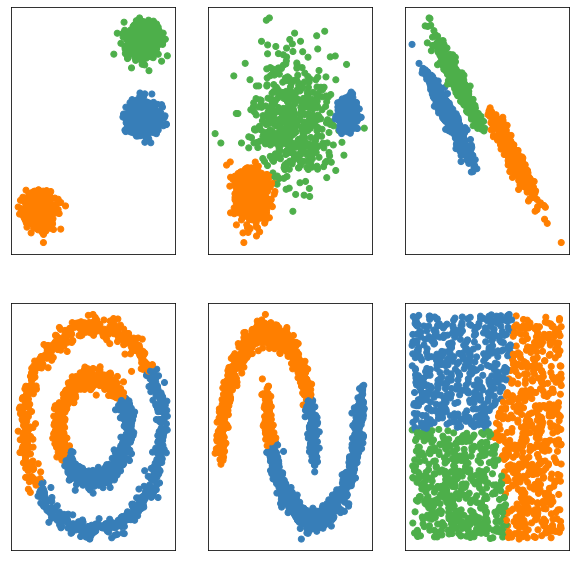

In [48]:
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, em_gm_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    em_gm = GaussianMixture(n_components=em_gm_params['n_clusters'])
    
    em_gm.fit(X)
    y_pred = em_gm.predict(X)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

## Практика

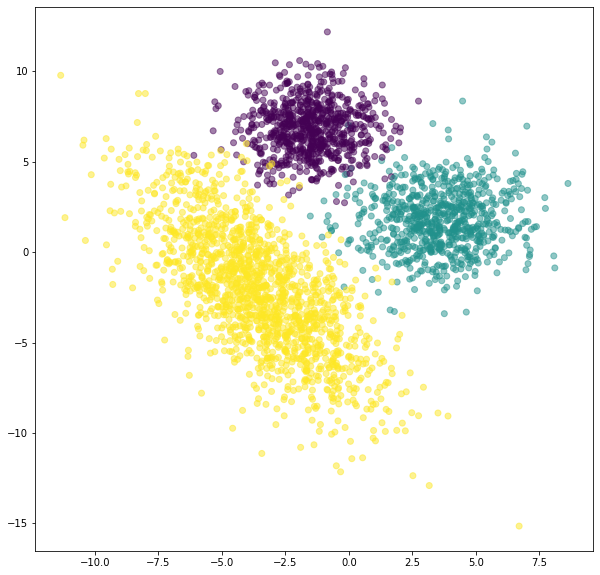

{0: 750, 1: 750, 2: 1500}
[[-2 -4]
 [ 1  4]
 [-5  0]]
{0: 795, 1: 1510, 2: 695}


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture


n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

gm = GaussianMixture(n_components=3, random_state=42 )

gm.fit(X)
means = gm.means_
print(np.round(gm.means_).astype(np.int))
y_pred = gm.fit_predict(X)
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

In [99]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

data = pd.read_csv(r'https://lms.skillfactory.ru/assets/courseware/v1/fc9a6b3836e87e600ca5ee7880dd264e/asset-v1:SkillFactory+DS-MASTERS+01SEPT2020+type@asset+block/snsdata.csv')
# Удаление признаков кроме ключевыхслов
X = data.drop(['gradyear','gender','age','friends'],axis=1)
X_sc = pd.DataFrame(StandardScaler().fit_transform(X), index=X.index, columns=X.columns)

gm = GaussianMixture(n_components=9, random_state=123 )
gm.fit(X_sc)

X['EM_label'] = pd.Series(gm.predict(X_sc), index=X.index)
print('Кластер 7го ученика:',X.loc[7,'EM_label'])
print('Количество итераций до сходимости:',gm.n_iter_)

Кластер 7го ученика: 3
Количество итераций до сходимости: 29


# Агломеративная кластеризация

![AG](https://media.giphy.com/media/pSNCWCEAsgrAs/giphy.gif "Агломеративная кластеризация")


Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [71]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean', # “euclidean”, “l1”, “l2”, “manhattan”, 
                                                   # “cosine”, or “precomputed”
                             linkage='ward', # “ward”, “complete”, “average”, “single”
                            )

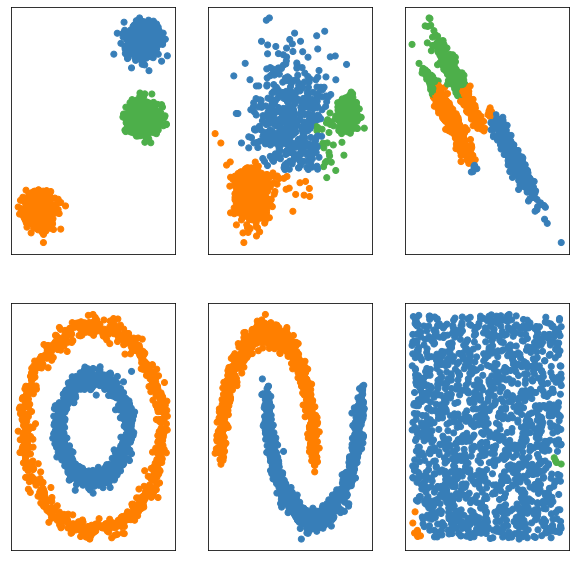

In [72]:
import warnings

from sklearn.neighbors import kneighbors_graph

datasets_params_list = [
    (blobs, {'n_clusters': 3, 'n_neighbors': 10}),
    (varied, {'n_clusters': 3, 'n_neighbors': 2}),
    (aniso, {'n_clusters': 3, 'n_neighbors': 2}),
    (noisy_circles, {'n_clusters': 2, 'n_neighbors': 10}),
    (noisy_moons, {'n_clusters': 2, 'n_neighbors': 10}),
    (no_structure, {'n_clusters': 3, 'n_neighbors': 10})]

for i, (X, ac_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    
    # строим матрицу смежности
    connectivity = kneighbors_graph(X, 
                                    n_neighbors=ac_params['n_neighbors'], 
                                    include_self=False)
    # делаем матрицу смежности симметричной
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    ac = AgglomerativeClustering(n_clusters=ac_params['n_clusters'], 
                                 linkage='average',
                                 connectivity=connectivity)
    
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        ac.fit(X)
    y_pred = ac.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

## Практика

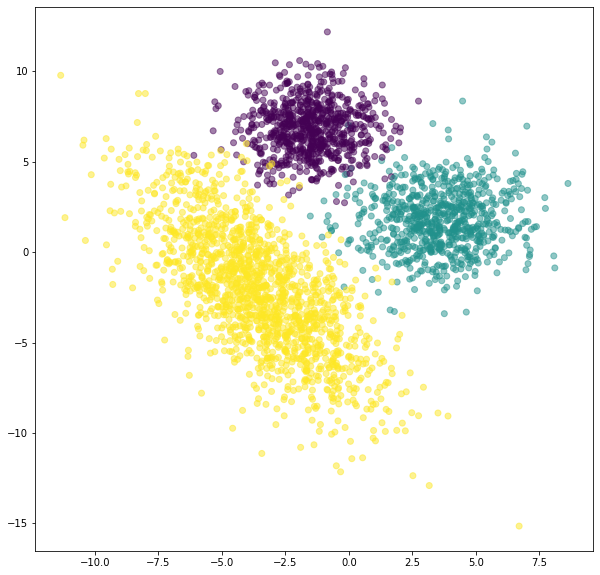

{0: 750, 1: 750, 2: 1500}
(3000,)
{0: 1112, 1: 1142, 2: 746}


In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering



n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))


ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
print(ac.labels_.shape)
y_pred = ac.fit_predict(X)
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

In [90]:
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T) # матрица смежности для ненаправленного графа на основе датасета
ac = AgglomerativeClustering(n_clusters=3,connectivity=connectivity)
y_pred = ac.fit_predict(X)
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

{0: 1486, 1: 746, 2: 768}


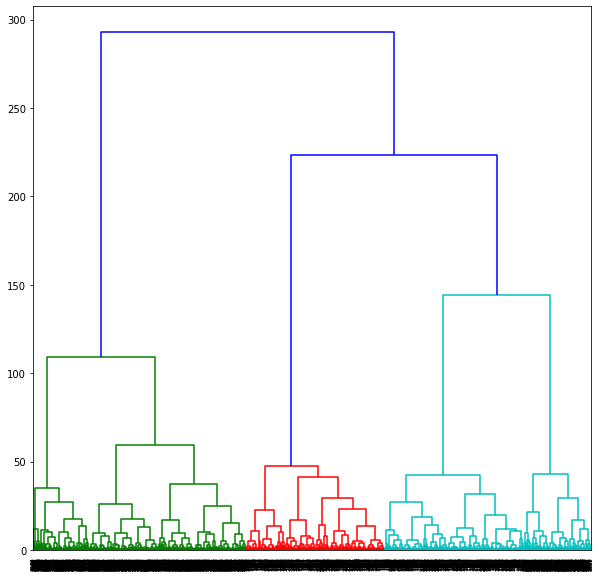

In [94]:
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

# # строим дендрограмму
plt.figure()
dn = dendrogram(Z);

[1 2 3 4 5 6]
    Energy  Protein  Fat  Calcium  Iron  Agg_labels
21     155       16    9      157   1.8           3
23     120       17    5      159   0.7           3
   Energy  Protein  Fat  Calcium  Iron  Agg_labels
2     420       15   39        7   2.0           2


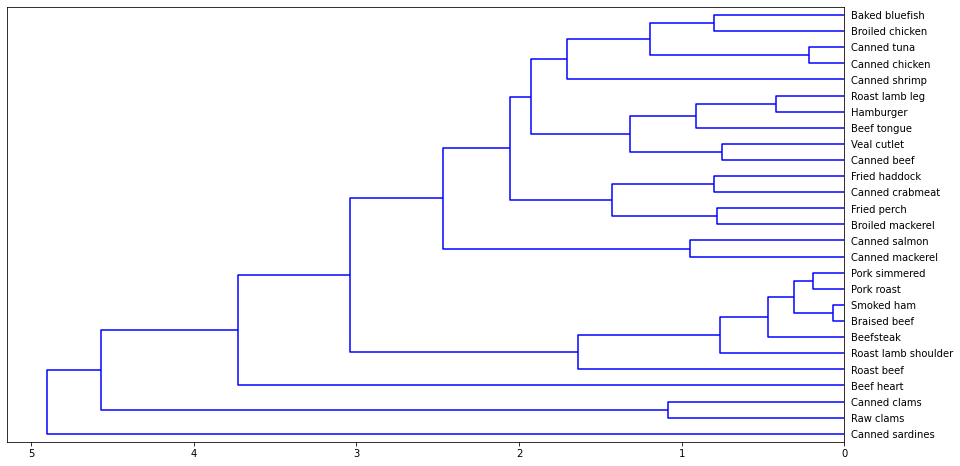

In [104]:
# Рассмотрим данные, содержащие информацию о составе различных продуктов.
# Попробуем построить на них иерархическую кластеризацию
# Рассмотрим данные, содержащие информацию о составе различных продуктов.
# Попробуем построить на них иерархическую кластеризацию
import pandas as pd
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


data = pd.read_csv(r'https://lms.skillfactory.ru/assets/courseware/v1/674de4a149becd117e895dc5bf1e36f4/asset-v1:SkillFactory+DS-MASTERS+01SEPT2020+type@asset+block/food.txt',sep=' ')
X = data.drop('Name',axis=1)
X_sc = pd.DataFrame(StandardScaler().fit_transform(X), index=X.index, columns=X.columns)


from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_sc, method='average', metric='euclidean')
names = data.Name.values
plt.figure(figsize=(15,8))
dend = dendrogram(Z, color_threshold=0, labels=list(names), 
                  orientation='left')
t = 2.3
labels = fcluster(Z, t, criterion='distance')
# Сколько всего кластеров получилось для продуктов
print(np.unique(labels))
X['Agg_labels'] = labels
# номер кластера, в который попали продукты с содержанием кальция от 150 до 160
print(X[(X['Calcium']>=150)&(X['Calcium']<=160)])
# номер кластера, в который попал продукт с максимальной жирностью.
print(X[X['Fat']==X['Fat'].max()])



# DBSCAN

Интерактивная визуализация работы DBSCAN – https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

Для примера из видео: **Pimpled Smiley**

![DBSCAN](https://media0.giphy.com/media/lCL2GQewp7fkk/giphy.gif "DBSCAN")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5,
                min_samples=5)

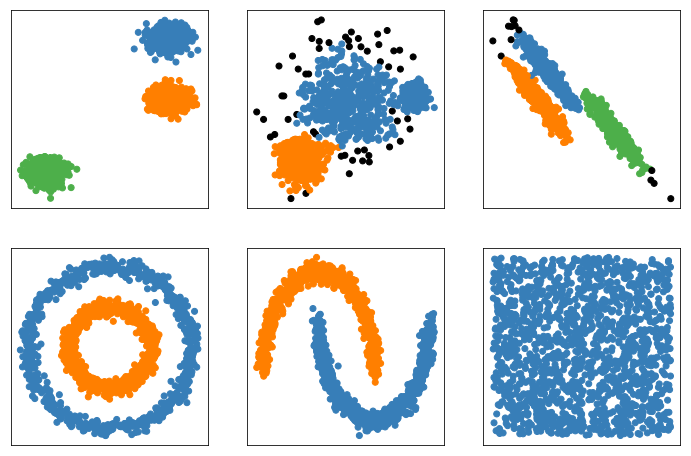

In [ ]:
datasets_params_list = [
    (blobs, {'eps': 0.3}),
    (varied, {'eps': 0.18}),
    (aniso, {'eps': 0.184}),
    (noisy_circles, {'eps': 0.3}),
    (noisy_moons, {'eps': 0.3}),
    (no_structure, {'eps': 0.3})]

for i, (X, dbscan_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    dbscan = DBSCAN(eps=dbscan_params['eps'])
    
    dbscan.fit(X)
    y_pred = dbscan.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # чёрным цветом отметим выбросы
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

## Практика

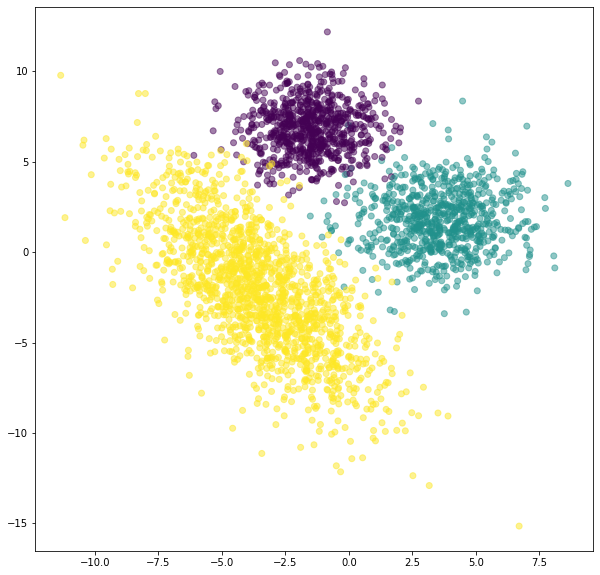

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))


In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
#число получившихся кластеров
print(np.unique(dbscan.labels_))
#Кол-во выбросов
print('Кол-во выбросов',dbscan.labels_[dbscan.labels_ == -1].shape[0])

dbscan2 = DBSCAN(eps=0.8, min_samples=35)
dbscan2.fit(X)
print('Кол-во выбросов 2',dbscan2.labels_[dbscan2.labels_ == -1].shape[0])


[-1  0  1  2]
Кол-во выбросов 368
Кол-во выбросов 2 583


# Практика. Коэффициент силуэта

In [21]:
# Исходный набор
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=kmeans_pred, metric='euclidean')



0.5131209788437305

In [47]:
#Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета. Посчитайте коэффициент силуэта для получившейся кластеризации. Ответ округлите до десятых и запишите с точкой.
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

X_st = StandardScaler().fit_transform(X_st)
em_gm = GaussianMixture(n_components=3,random_state=42)    
em_gm.fit(X)
em_pred = em_gm.predict(X_st)
print(silhouette_score(X=X_st, labels=em_pred, metric='euclidean'))

0.36482041785448505


In [18]:
# Сравните результаты кластеризации четырёх рассмотренных алгоритмов gри помощи коэффициента силуэта,
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN



kmeans = KMeans(n_clusters=3, random_state=42)
gm = GaussianMixture(n_components=3,random_state=42)    
ac = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.9,min_samples=35)

for i in [kmeans,gm,ac,dbscan]:
  pred = i.fit_predict(X_st)
  print(type(i),silhouette_score(X=X_st, labels=pred, metric='euclidean'))

<class 'sklearn.cluster._kmeans.KMeans'> 0.5087089713813616
<class 'sklearn.mixture._gaussian_mixture.GaussianMixture'> 0.5022144530587643
<class 'sklearn.cluster._agglomerative.AgglomerativeClustering'> 0.4945318429387883
<class 'sklearn.cluster._dbscan.DBSCAN'> 0.5490111952506722


In [30]:
# Подберите оптимальное количество кластеров с помощью коэффициента силуэта. Для этого найдите такое число кластеров, при котором значение коэффициента будет максимальным.
# В качестве ответа через пробел введите число кластеров, при котором значение коэффициента силуэта для результатов кластеризации было наибольшим для каждого из алгоритмов.
km_ = []
gm_ = []
ac_ = []
for j in range(2,11):
    kmeans = KMeans(n_clusters=j, random_state=42)
    gm = GaussianMixture(n_components=j,random_state=42) 
    ac = AgglomerativeClustering(n_clusters=j)
    pred_kmeans = kmeans.fit_predict(X)
    pred_gm = gm.fit_predict(X)
    pred_ac = ac.fit_predict(X)
    km_.append(silhouette_score(X=X, labels=pred_kmeans, metric='euclidean'))
    gm_.append(silhouette_score(X=X, labels=pred_gm, metric='euclidean'))
    ac_.append(silhouette_score(X=X, labels=pred_ac, metric='euclidean'))
print(np.argmax(km_)+2,np.argmax(gm_)+2,np.argmax(ac_)+2)

3 4 4


# Практика. Однородность.

In [51]:
# Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи однородности
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

kmeans = KMeans(n_clusters=3, random_state=42)
gm = GaussianMixture(n_components=3,random_state=42) 
ac = AgglomerativeClustering(n_clusters=3)
db = DBSCAN(eps=0.9, min_samples=35)
X_st = StandardScaler().fit_transform(X_st)
pred_kmeans = kmeans.fit_predict(X_st)
pred_gm = gm.fit_predict(X_st)
pred_ac = ac.fit_predict(X_st)
pred_db = db.fit_predict(X_st)
# В качестве ответа укажите максимальное значение однородности, полученное при помощи данных моделей.
print(round(np.max([homogeneity_score(labels_true=y, labels_pred=pred_kmeans),
      homogeneity_score(labels_true=y, labels_pred=pred_ac),
      homogeneity_score(labels_true=y, labels_pred=pred_db),
      homogeneity_score(labels_true=y, labels_pred=pred_gm)]),2)
      )

0.93


# Практика. Полнота.

In [50]:
from sklearn.metrics.cluster import completeness_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

X_st = StandardScaler().fit_transform(X)
em_gm = GaussianMixture(n_components=3,random_state=42)    
em_gm.fit(X_st)
em_pred = em_gm.predict(X_st)

# посчитаем полноту
print(completeness_score(labels_true=y, labels_pred=em_pred))

# Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи полноты
kmeans = KMeans(n_clusters=3, random_state=42)
gm = GaussianMixture(n_components=3,random_state=42) 
ac = AgglomerativeClustering(n_clusters=3)
db = DBSCAN(eps=0.9, min_samples=35)
X_st = StandardScaler().fit_transform(X_st)
pred_kmeans = kmeans.fit_predict(X_st)
pred_gm = gm.fit_predict(X_st)
pred_ac = ac.fit_predict(X_st)
pred_db = db.fit_predict(X_st)
# В качестве ответа укажите максимальное значение полноты
print(round(np.max([completeness_score(labels_true=y, labels_pred=pred_kmeans),
      completeness_score(labels_true=y, labels_pred=pred_ac),
      completeness_score(labels_true=y, labels_pred=pred_db),
      completeness_score(labels_true=y, labels_pred=pred_gm)]),2)
      )

0.9325740421656737
0.93


# Практика. V-мера.

In [81]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.cluster import v_measure_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph


X_st = StandardScaler().fit_transform(X)
em_gm = GaussianMixture(n_components=3,random_state=42)    
em_gm.fit(X_st)
em_pred = em_gm.predict(X_st)

# посчитаем полноту
print(round(v_measure_score(labels_true=y, labels_pred=em_pred),2))
# Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering и DBSCAN
kmeans = KMeans(n_clusters=3, random_state=42)
gm = GaussianMixture(n_components=3,random_state=42) 
ac = AgglomerativeClustering(n_clusters=3)
db = DBSCAN(eps=0.9, min_samples=35)
X_st = StandardScaler().fit_transform(X_st)
pred_kmeans = kmeans.fit_predict(X_st)
pred_gm = gm.fit_predict(X_st)
pred_ac = ac.fit_predict(X_st)
pred_db = db.fit_predict(X_st)
# В качестве ответа укажите максимальное значение v-меры
print(round(np.max([v_measure_score(labels_true=y, labels_pred=pred_kmeans),
      v_measure_score(labels_true=y, labels_pred=pred_ac),
      v_measure_score(labels_true=y, labels_pred=pred_db),
      v_measure_score(labels_true=y, labels_pred=pred_gm)]),2)
      )
# Сравним модификации K-means с использованием случайной инициализации центроид и с использованием алгоритма K-means++ для инициализации центроид
kmeans_plus = KMeans(n_clusters=3, init='k-means++', n_init=1, random_state=42)
kmeans_random = KMeans(n_clusters=3, init='random', n_init=1, random_state=42)
#В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей
print(round(np.max([v_measure_score(labels_true=y, labels_pred=kmeans_plus.fit_predict(X_st)),v_measure_score(labels_true=y, labels_pred=kmeans_random.fit_predict(X_st))]),2))
# Теперь сравним k-means с ещё одной модификацией — K-means mini batc
kmeans_mini_batch = MiniBatchKMeans(n_clusters=3, random_state=42)
kmeans1 = KMeans(n_clusters=3, n_init=1, random_state=42)
kmeans1_pred=kmeans1.fit_predict(X_st)
kmeans_mini_batch.fit(X_st)
kmeans_mini_batch_pred = kmeans_mini_batch.labels_
#В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей
print(round(np.max([v_measure_score(labels_true=y, labels_pred=kmeans1_pred),v_measure_score(labels_true=y, labels_pred=kmeans_mini_batch_pred)]),2))
# Рассмотрим агломеративную кластеризацию. Сравним, как влияет на качество кластеризации разный тип расстояния между кластерами.
# Обучите на исходном датасете четыре модели AgglomerativeClustering с параметром n_clusters=3, меняя параметр linkage
# В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей.
for i in ['ward', 'complete', 'average', 'single']:
    ac1 = AgglomerativeClustering(n_clusters=3,linkage=i)
    print(i,round(v_measure_score(labels_true=y, labels_pred=ac1.fit_predict(X_st)),2))

# Сравним, как влияет предварительный расчёт матрицы смежности на качество агломеративной кластеризации.
# Обучите на исходном датасете две модели AgglomerativeClustering:с параметром n_clusters=3, с параметром n_clusters=3 и предварительно посчитанной матрицей смежности для объектов датасета
connectivity = kneighbors_graph(X, n_neighbors=
6, include_self=
False)
connectivity = 0.5 * (connectivity + connectivity.T)
ac2 = AgglomerativeClustering(n_clusters=3,connectivity=connectivity)
ac3 = AgglomerativeClustering(n_clusters=3)
# В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей.
print(round(v_measure_score(labels_true=y, labels_pred=ac2.fit_predict(X_st)),2),round(v_measure_score(labels_true=y, labels_pred=ac3.fit_predict(X_st)),2))
# Обучите на исходном датасете две модели DBSCAN:с параметрами eps=0.9, min_samples=35, с параметрами eps=0.8, min_samples=35
db1 = DBSCAN(eps=0.9, min_samples=35)
db2 = DBSCAN(eps=0.8, min_samples=35)
# В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей.
print(round(v_measure_score(labels_true=y, labels_pred=db1.fit_predict(X)),2),round(v_measure_score(labels_true=y, labels_pred=db2.fit_predict(X)),2))
# Обучите на исходном датасете модель DBSCAN с параметрами eps=0.9, min_samples=35. Посчитайте значение v-меры только для основных и граничных объектов выборки, то есть для объектов, что не являются выбросами. 
db3 = DBSCAN(eps=0.9, min_samples=35)
db3_pred = db3.fit_predict(X)
print(round(v_measure_score(labels_true=y[db3_pred!=-1], labels_pred=db3_pred[db3_pred!=-1]),2))
# Влияет ли предобработка данных на результат кластеризации. Обучите две модели AgglomerativeClustering с параметрами n_clusters=3:на признаках исходного датасета, трансформируйте признаки при помощи стандартной нормализации.
ac4 = AgglomerativeClustering(n_clusters=3)
# В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей.
print(round(v_measure_score(labels_true=y, labels_pred=ac4.fit_predict(X_st)),2),round(v_measure_score(labels_true=y, labels_pred=ac4.fit_predict(X)),2))
# Обучите две модели AgglomerativeClustering с параметрами n_clusters=3:на признаках исходного датасета,предварительно трансформируйте признаки при помощи MinMax нормализации.
X_min_max = MinMaxScaler().fit_transform(X)
print(round(v_measure_score(labels_true=y, labels_pred=ac4.fit_predict(X_min_max)),2),round(v_measure_score(labels_true=y, labels_pred=ac4.fit_predict(X)),2))

0.93
0.93
0.79
0.79
ward 0.91
complete 0.58
average 0.68
single 0.0
0.88 0.91
0.77 0.71
0.97
0.91 0.7
0.89 0.7
